In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3],
                     [7.8], [8.9], [5.2], [4.59], [2.1],
                     [8], [5], [7.5], [5], [4],
                     [8], [5.2], [4.9], [3], [4.7],
                     [4], [4.8], [3.5], [2.1], [4.1]],
                    dtype = np.float32)

y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4],
                     [3.3], [2.6], [1.96], [3.13], [1.76],
                     [3.2], [2.1], [1.6], [2.5], [2.2],
                     [2.75], [2.4], [1.8], [1], [2],
                     [1.6], [2.4], [2.6], [1.5], [3.1]],
                    dtype = np.float32)

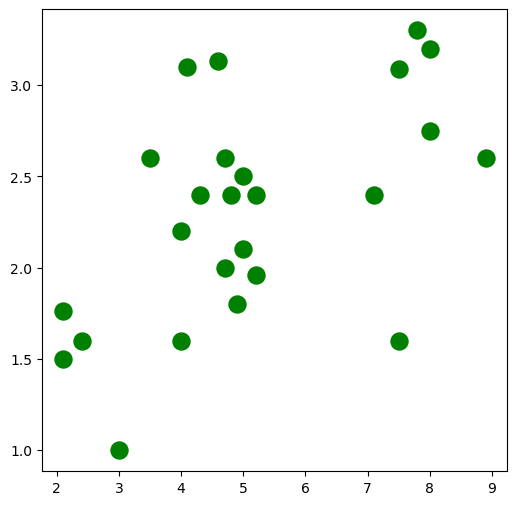

In [7]:
plt.figure(figsize=(6,6))

plt.scatter(x_train, y_train, c='green', s=150, label='Original data')

plt.show()

In [8]:
x = torch.from_numpy(x_train)
y = torch.from_numpy(y_train)

In [9]:
x.size()

torch.Size([25, 1])

In [10]:
inp = 1
hidden = 5
out = 1

In [11]:
model = torch.nn.Sequential(
        torch.nn.Linear(inp, hidden),
        torch.nn.ReLU(),
        torch.nn.Linear(hidden, out))

In [12]:
loss_fn = torch.nn.MSELoss(reduction='sum') # reduction='sum' will give us the sum of the squares of the actual versus the predicted values.

In [13]:
learning_rate = 1e-4

for i in range(500):

    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(i, loss.item())

    model.zero_grad()
    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 253.6495361328125
1 184.9477996826172
2 136.72439575195312
3 101.9939956665039
4 76.77423095703125
5 58.50798034667969
6 45.40803909301758
7 36.14035415649414
8 29.681419372558594
9 25.246463775634766
10 22.24294090270996
11 20.233257293701172
12 18.901857376098633
13 18.026391983032227
14 17.453367233276367
15 17.078739166259766
16 16.833049774169922
17 16.670394897460938
18 16.56072235107422
19 16.484960556030273
20 16.430736541748047
21 16.390134811401367
22 16.358129501342773
23 16.331483840942383
24 16.306596755981445
25 16.283817291259766
26 16.262372970581055
27 16.241409301757812
28 16.220535278320312
29 16.20000648498535
30 16.179702758789062
31 16.159557342529297
32 16.13951873779297
33 16.11956787109375
34 16.099674224853516
35 16.079824447631836
36 16.060026168823242
37 16.040258407592773
38 16.020530700683594
39 16.000823974609375
40 15.981155395507812
41 15.961509704589844
42 15.941888809204102
43 15.922293663024902
44 15.902725219726562
45 15.883240699768066
46 15.8638

In [14]:
predicted_in_tensor = model(x)
predicted_in_tensor

tensor([[1.9839],
        [1.0939],
        [3.0673],
        [2.9125],
        [1.8291],
        [3.1834],
        [3.6090],
        [2.1773],
        [1.9413],
        [0.9738],
        [3.2608],
        [2.0999],
        [3.0673],
        [2.0999],
        [1.7130],
        [3.2608],
        [2.1773],
        [2.0613],
        [1.3261],
        [1.9839],
        [1.7130],
        [2.0226],
        [1.5195],
        [0.9738],
        [1.7517]], grad_fn=<AddmmBackward0>)

In [15]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.9838636 ],
       [1.0938841 ],
       [3.0673172 ],
       [2.912538  ],
       [1.8290849 ],
       [3.1834016 ],
       [3.6090438 ],
       [2.1773374 ],
       [1.9412994 ],
       [0.97377175],
       [3.260791  ],
       [2.099948  ],
       [3.0673172 ],
       [2.099948  ],
       [1.7130003 ],
       [3.260791  ],
       [2.1773374 ],
       [2.0612533 ],
       [1.3260525 ],
       [1.9838636 ],
       [1.7130003 ],
       [2.0225587 ],
       [1.5195266 ],
       [0.97377175],
       [1.751695  ]], dtype=float32)

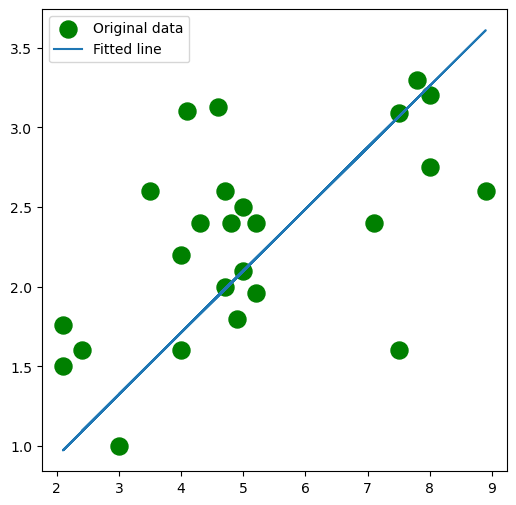

In [16]:
plt.figure(figsize=(6,6))

plt.scatter(x_train, y_train, c='green', s=150, label='Original data')

plt.plot(x_train, predicted, label = 'Fitted line ')

plt.legend()

plt.show()

In [17]:
model = torch.nn.Sequential(
    torch.nn.Linear(inp, hidden),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden, out))

loss_fn = torch.nn.MSELoss(reduction='sum')

In [18]:
learning_rate = 1e-4

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for i in range(500):

    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(i, loss.item())

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

0 511.09112548828125
1 310.7167053222656
2 203.02017211914062
3 137.674560546875
4 95.4645767211914
5 67.32936096191406
6 48.323699951171875
7 35.449405670166016
8 26.75628089904785
9 20.923006057739258
10 17.037872314453125
11 14.469633102416992
12 12.783483505249023
13 11.682734489440918
14 10.96713638305664
15 10.502986907958984
16 10.201910972595215
17 10.005995750427246
18 9.877588272094727
19 9.792349815368652
20 9.734635353088379
21 9.69443416595459
22 9.665350914001465
23 9.64332389831543
24 9.625770568847656
25 9.611058235168457
26 9.598148345947266
27 9.586390495300293
28 9.57536792755127
29 9.564824104309082
30 9.554586410522461
31 9.544560432434082
32 9.534671783447266
33 9.524887084960938
34 9.515172958374023
35 9.505516052246094
36 9.495908737182617
37 9.48634147644043
38 9.476807594299316
39 9.46730899810791
40 9.457841873168945
41 9.448404312133789
42 9.438998222351074
43 9.429620742797852
44 9.420272827148438
45 9.410951614379883
46 9.401659965515137
47 9.3923950195312

In [19]:
predicted_in_tensor = model(x)
predicted_in_tensor

tensor([[2.1221],
        [1.4998],
        [2.8796],
        [2.7714],
        [2.0139],
        [2.9608],
        [3.2584],
        [2.2574],
        [2.0923],
        [1.4187],
        [3.0149],
        [2.2033],
        [2.8796],
        [2.2033],
        [1.9327],
        [3.0149],
        [2.2574],
        [2.1762],
        [1.6622],
        [2.1221],
        [1.9327],
        [2.1491],
        [1.7974],
        [1.4187],
        [1.9598]], grad_fn=<AddmmBackward0>)

In [20]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[2.1220899],
       [1.4998374],
       [2.879615 ],
       [2.771397 ],
       [2.0138721],
       [2.9607785],
       [3.2583776],
       [2.2573621],
       [2.09233  ],
       [1.418674 ],
       [3.014887 ],
       [2.2032533],
       [2.879615 ],
       [2.2032533],
       [1.9327087],
       [3.014887 ],
       [2.2573621],
       [2.176199 ],
       [1.6621641],
       [2.1220899],
       [1.9327087],
       [2.1491446],
       [1.7974365],
       [1.418674 ],
       [1.9597633]], dtype=float32)

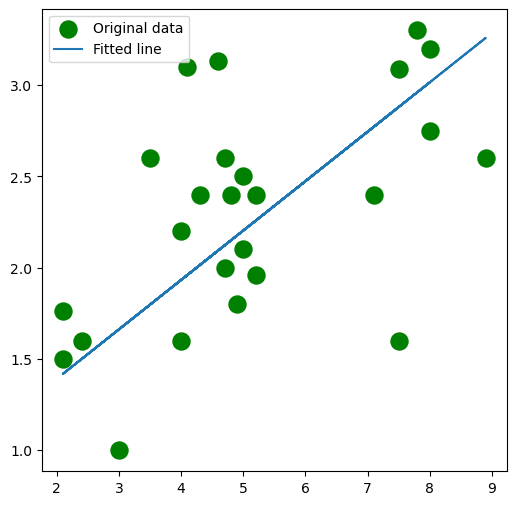

In [21]:
plt.figure(figsize=(6,6))

plt.scatter(x_train, y_train, c='green', s=150, label='Original data')

plt.plot(x_train, predicted, label = 'Fitted line ')

plt.legend()

plt.show()